In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#| default_exp plots.util
from nbdev.showdoc import show_doc

In [3]:
from ml.transform.util.relative_2d_positional import get_2d_relative_coord

In ["Swin Transformer: Hierarchical Vision Transformer using Shifted Windows"](https://arxiv.org/pdf/2103.14030.pdf), the relative positional encoding is used to capture translation invariance. In this notebook, we will implement it from scratch.


In [8]:
#| export

import matplotlib.pyplot as plt
import seaborn as sns

def show_matrixes_as_images(positions):
    n: int = len(positions)
    f = plt.figure()
    for i in range(n):
        # Debug, plot figure
        ax = f.add_subplot(1, n, i + 1)
        ax.set_title(f'Channel {i}')
        sns.heatmap(positions[i], annot=positions[i], square=True, cbar=False)
    
    plt.show(block=True)
    plt.close()

In [9]:
W = 3
d = get_2d_relative_coord(W)

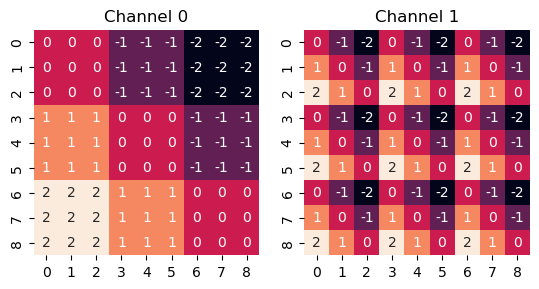

In [10]:
# Note the official implementation is row dimension relative to col dimension
show_matrixes_as_images(d)

In [30]:
#|export
import torchvision

def show_images(images, nrow=1, normalize=False, title=None):
    """
        images: is list of tensor in (C, W, H)
    """
    # Organize the images into a grid for nicer visualization
    img_grid = torchvision.utils.make_grid(
        images,
        nrow=nrow, 
        normalize=normalize,
        pad_value=0.5)
    # change it back to (W, H, C)
    img_grid = img_grid.permute(1, 2, 0)
    if title:
        plt.title(title)
    plt.imshow(img_grid)
    plt.axis("off")
    plt.show()
    plt.close()

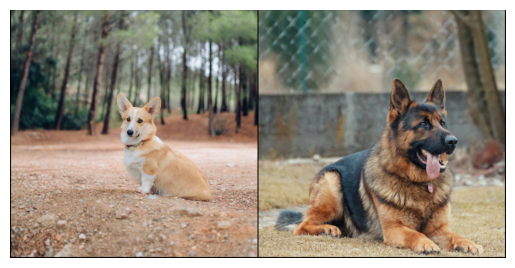

In [31]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path

dog1_int = read_image(str(Path('assets') / 'dog1.jpg'))
dog2_int = read_image(str(Path('assets') / 'dog2.jpg'))
dog_list = [dog1_int, dog2_int]

grid = make_grid(dog_list)
show_images(grid)

for more information on display weight gradient see [Activation functions](https://lightning.ai/docs/pytorch/stable/notebooks/course_UvA-DL/02-activation-functions.html)

In [38]:
#| hide
import nbdev; nbdev.nbdev_export()